#### Optimum learning rate on Fashion MNIST dataset using MLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras # Don't import keras from tensorflow like (from tensorflow import keras)
import keras_lr_finder as lr_find # For finding optimum learning rate [pip install keras_lr_finder]
import seaborn as sns

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Reading train and test data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Making validation data out of test data
val_data = test_data.iloc[:5000,:]
test_data = test_data.iloc[5000:,:]

# Fetching the labels
train_labels = train_data.label
val_labels = val_data.label
test_labels = test_data.label

# Reshaping training data
train_images = train_data.iloc[:,1:].values.reshape(60000, 28, 28)

# Reshaping validation data
val_images = val_data.iloc[:,1:].values.reshape(5000, 28, 28)

# Reshaping test data
test_images = test_data.iloc[:,1:].values.reshape(5000, 28, 28)

# Scaling data in the range of 0-1
train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

In [4]:
# Defining multi-layer perceptron model with 1 hidden layer having 256 neurons and output layer with 10 possible answers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Perform conversion of higher dimensional data (here, 2-D) to 1-D data.
    keras.layers.Dense(256, activation=tf.nn.relu), # Hidden layer with 256 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer with softmax activation function 
])                                                   # which gives final output in terms of probability. 

In [5]:
# Defining parameters like optmizer, loss function and evaluating metric
model.compile(loss='sparse_categorical_crossentropy', # 
              optimizer=keras.optimizers.Adam(), # Learning rate and momentum can be passed inside optimizer
              metrics=['accuracy'])

In [93]:
lr_finder = lr_find.LRFinder(model)

# Training can stop abruptly if rate is set too high. In such cases, reduce the value of end_lr. 
lr_finder.find(train_images, train_labels, start_lr=0.0001, end_lr=0.09, batch_size=512, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 1.1291 - acc: 0.6601
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5396 - acc: 0.8171
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.4523 - acc: 0.8424
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.4700 - acc: 0.8324
Epoch 5/5
38912/60000 [==================>...........] - ETA: 1s - loss: 0.4894 - acc: 0.8279- ETA: 1s - loss: 0.4749 - acc:

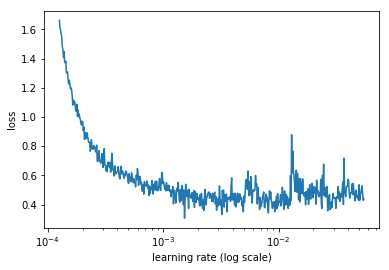

In [94]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

#### From the above figure following learning rate can be choosen due to fast decrease in loss -
* base_lr = $10^{-4}$
* max_lr = $10^{-3}$

## Setting cyclic learning rate for model training
Ensure you have `clr_callback.py` file in the same directory of current module

In [6]:
from clr_callback import * # Importing cyclic learning rate module

In [13]:
# Pass the values of base_lr with the value of 
cb_triangular = CyclicLR(base_lr=0.0001, max_lr=0.001, step_size=2000., mode='triangular2') # Setting callback for model

In [14]:
model.fit(train_images, train_labels, batch_size=2000, epochs=100, callbacks=[cb_triangular], verbose=1)

Epoch 1/100
 2000/60000 [>.............................] - ETA: 3s - loss: 0.2772 - acc: 0.9075

D:\Anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 3s 54us/step - loss: 0.2608 - acc: 0.9078
Epoch 2/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2569 - acc: 0.9099
Epoch 3/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2556 - acc: 0.9103
Epoch 4/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2546 - acc: 0.9101
Epoch 5/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2536 - acc: 0.9103
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2533 - acc: 0.9106
Epoch 7/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2525 - acc: 0.9107
Epoch 8/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.2514 - acc: 0.9113
Epoch 9/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.2504 - acc: 0.9116
Epoch 10/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2489 - acc: 0.9125
E

60000/60000 [==============================] - 4s 63us/step - loss: 0.1141 - acc: 0.9616
Epoch 80/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1078 - acc: 0.9658: 1s - loss: 0.1051 
Epoch 81/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1073 - acc: 0.9655
Epoch 82/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1052 - acc: 0.9658
Epoch 83/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1061 - acc: 0.9658: 1s - loss: 0.10
Epoch 84/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1028 - acc: 0.9666
Epoch 85/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1025 - acc: 0.9671
Epoch 86/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1029 - acc: 0.9667
Epoch 87/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1013 - acc: 0.9670
Epoch 88/100
60000/60000 [==============================] 

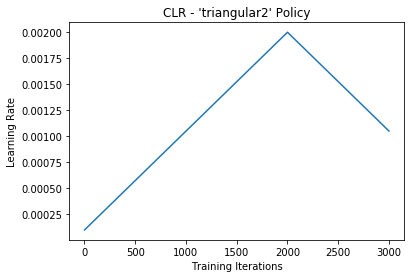

In [17]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular2' Policy")
plt.plot(cb_triangular.history['iterations'], cb_triangular.history['lr'])

# With more number of iterations the graph will correspond to that of a traingular wave